<a href="https://colab.research.google.com/github/debbie105/data_analyze_fin/blob/main/10757128_%E5%96%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

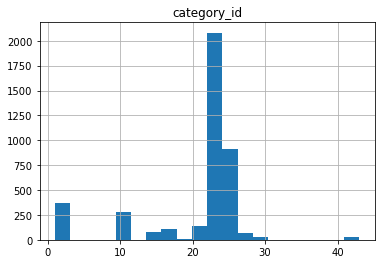

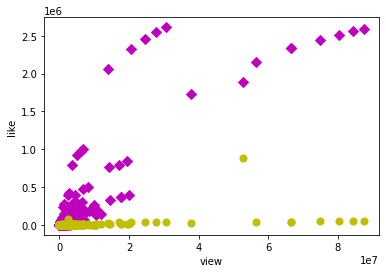

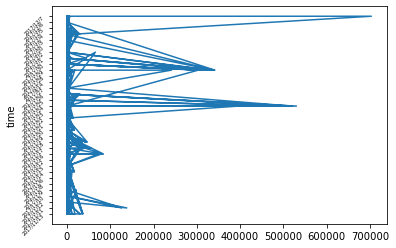

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

t = pd.read_csv("t2.csv")
t.columns

#category_id分布狀況
t[['category_id']].hist(bins=20)
plt.show()

#喜歡數/不喜歡與觀看數的關係是否呈現正相關
plt.scatter(t["views"],t['likes'],c = "m",s = 50,marker='D')
plt.scatter(t["views"],t['dislikes'],c = "y",s = 50)
plt.xlabel('view')
plt.ylabel('like')
plt.show()

#發布時間與留言數
plt.plot(t['comment_count'],t["publish_time"])
plt.ylabel("time" )
#時間序早到晚
plt.yticks(fontsize=5)
plt.yticks(rotation=45)
plt.show()


In [ ]:
continous_var = ["likes","dislikes","views","category_id","comment_count","comment_nub"]
t[continous_var].describe()

,likes,dislikes,views,category_id,comment_count,comment_nub
count,4.110000e+03,4110.000000,4.110000e+03,4110.000000,4110.000000,4.110000e+03
mean,1.564608e+04,591.154015,5.093113e+05,20.516788,2453.057421,1.623723e+04
std,1.435032e+05,14079.731814,3.489736e+06,7.475902,25035.086034,1.492359e+05
min,6.000000e+00,1.000000,3.954000e+03,1.000000,1.000000,9.000000e+00
25%,3.640000e+02,17.000000,4.161225e+04,22.000000,76.000000,4.105000e+02
50%,1.149500e+03,42.000000,9.366000e+04,24.000000,237.500000,1.228500e+03
75%,2.836750e+03,120.000000,2.498972e+05,25.000000,626.500000,2.994000e+03
max,2.611254e+06,884965.000000,8.745024e+07,43.000000,702790.000000,2.776797e+06


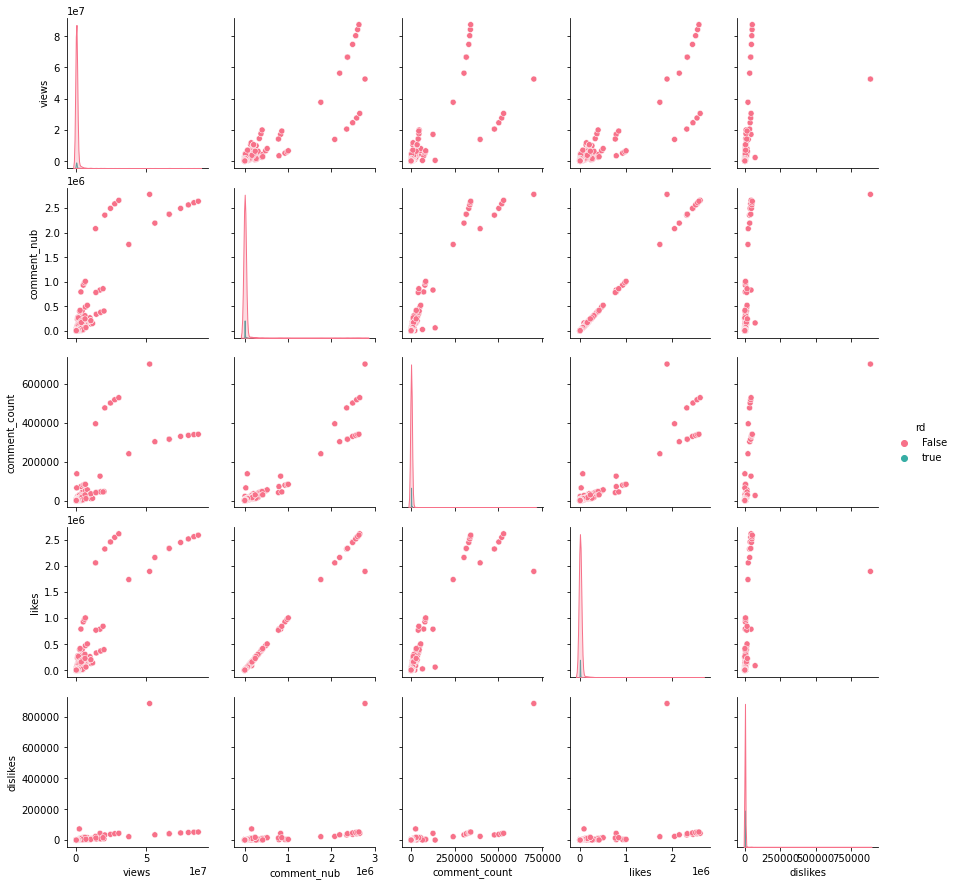

In [ ]:
import seaborn as sns
t['cd'] = t['comments_disabled'].replace({1: "true", 0: "False"})
t['rd'] = t['ratings_disabled'].replace({1: "true", 0: "False"})
sns.pairplot(t[["rd","cd","views","comment_nub","comment_count","likes","dislikes"]],
             hue = "rd", diag_kind='kde', kind='scatter', palette='husl')
plt.show()

<Figure size 1600x640 with 0 Axes>

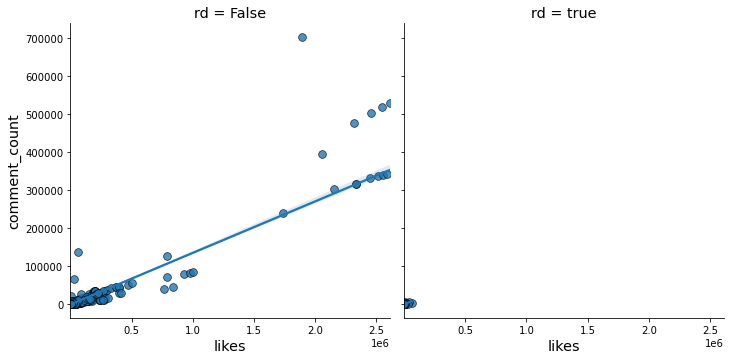

In [ ]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='likes', y='comment_count', data = t,
               robust = True,
               palette="Set1", col="rd",
               scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')

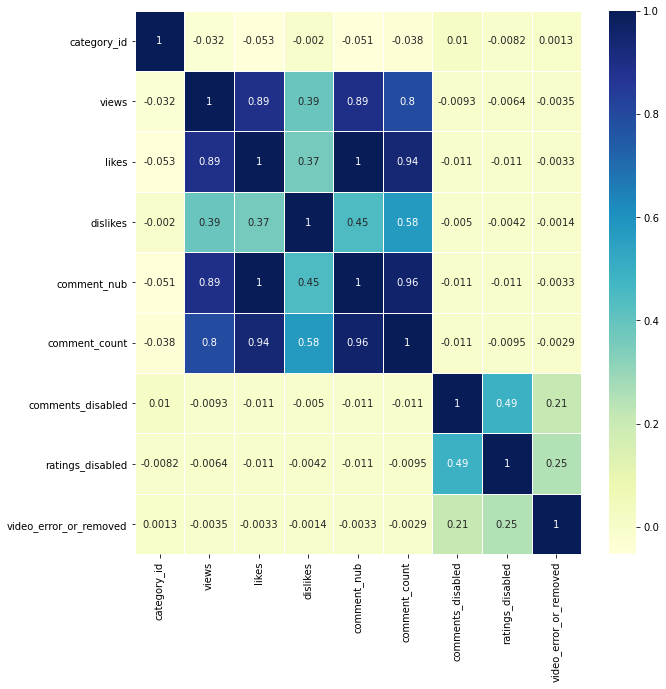

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(t.corr(), annot=True, linewidths=0.5, cmap="YlGnBu")
plt.show()

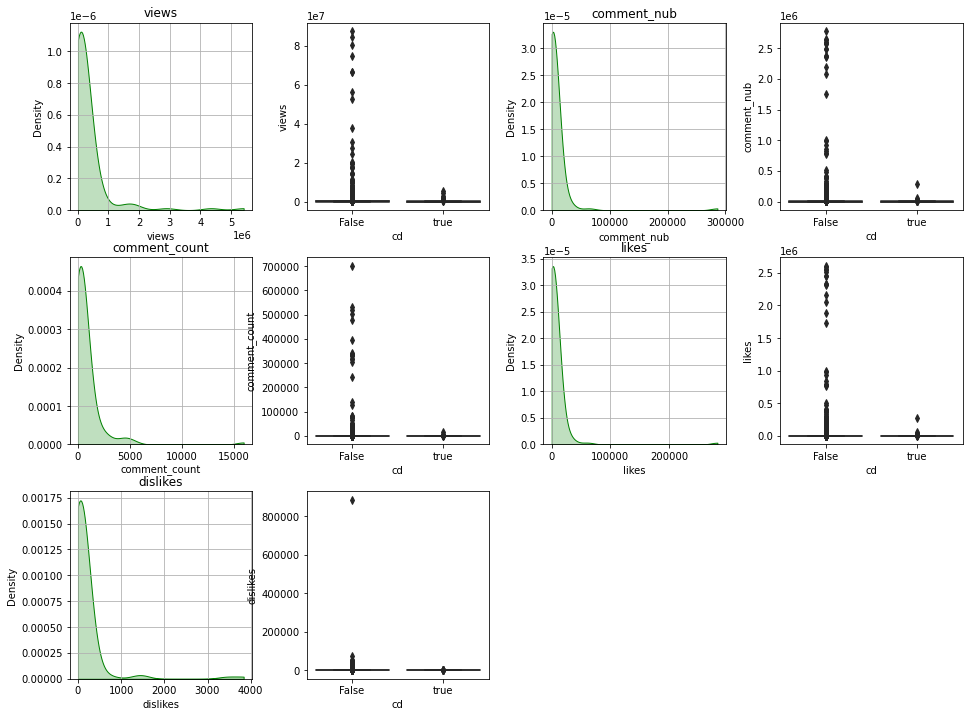

In [ ]:
continous_var = ["views","comment_nub","comment_count","likes","dislikes"]
plt.figure(figsize=(16, 25))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(t.loc[t["cd"]=='true', col], label="yes", color = "green", shade=True, cut=0)
    sns.kdeplot(t.loc[t["cd"]=='false', col], label="no",  color = "red", shade=True,  cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = t, x="cd", palette = ["green", "red"])

In [ ]:
x = pd.crosstab(t["cd"], t['comments_disabled'])
x.apply(lambda z: z/z.sum(), axis=1)

comments_disabled,0,1
cd,,
False,1.0,0.0
true,0.0,1.0


In [ ]:
x = pd.crosstab(t["cd"], t['ratings_disabled'])
x.apply(lambda z: z/z.sum(), axis=1)

ratings_disabled,0,1
cd,,
False,0.992004,0.007996
true,0.574074,0.425926
